Loading required package: Matrix



Loaded glmnet 4.1-10



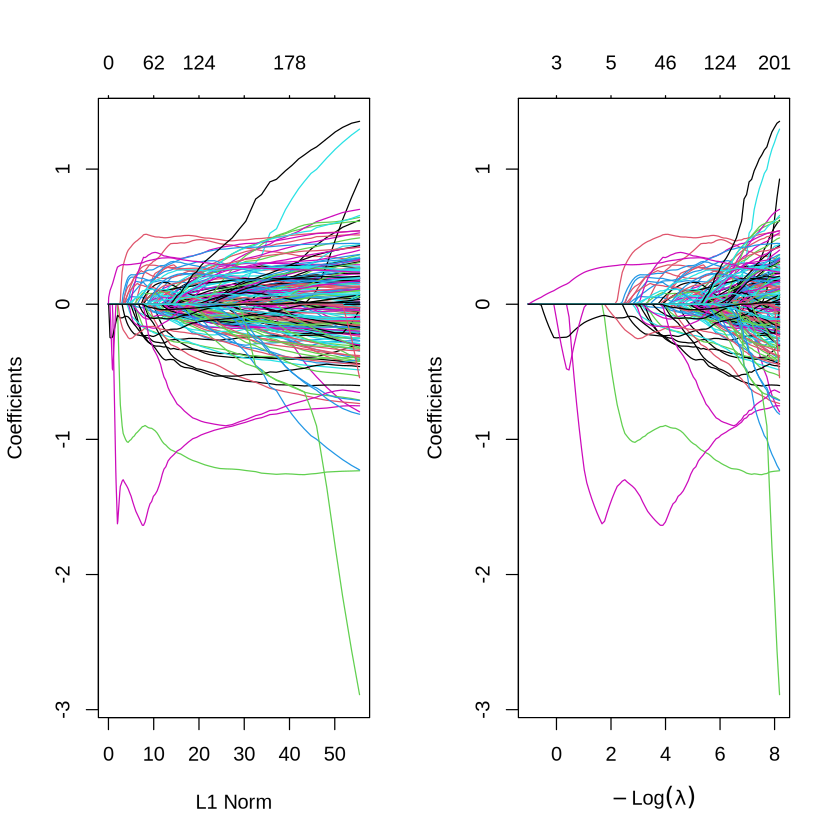

[1] 0.002861102

229 x 1 sparse Matrix of class "dgCMatrix"
                     lambda.1se
(Intercept)        5.7539146579
FP001              .           
FP002              0.3800187750
FP003             -0.0438434549
FP004             -0.0445167396
FP005              .           
FP006              .           
FP007              .           
FP008              .           
FP009              .           
FP010              .           
FP011              .           
FP012              .           
FP013              .           
FP014              .           
FP015              .           
FP016              .           
FP017              .           
FP018              .           
FP019              .           
FP020              .           
FP021              .           
FP022              .           
FP023              .           
FP024              .           
FP025             -0.0124781589
FP026              0.1090632694
FP027              .           
FP028              .         

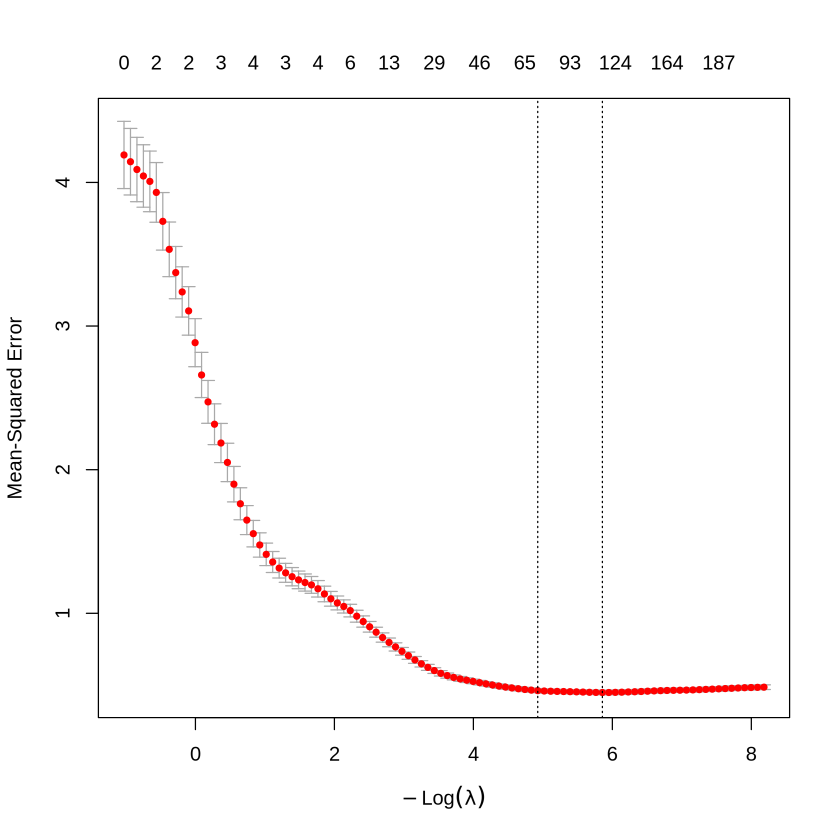

In [3]:
library(ISLR)
library(caret)
library(AppliedPredictiveModeling)
library(glmnet)

data(solubility)
#https://rdrr.io/rforge/AppliedPredictiveModeling/man/solubility.html

#Nota que los datos solTrainXtrans ya son normalizados
lasso.model1 <- cv.glmnet(as.matrix(solTrainXtrans), solTrainY, alpha = 1, standardize = FALSE)

dg <- par(mfrow=c(1, 2))
plot(lasso.model1$glmnet.fit, "norm",   label=TRUE)#norma L1 de los estimadores
#Cuando hay mucha penalización son cero, luego uno a uno son diferentes de cero
plot(lasso.model1$glmnet.fit, "lambda", label=TRUE)#lambda
par(dg)

plot(lasso.model1)
lasso.model1$lambda.min
coef(lasso.model1)

[1] 0.01831564

229 x 1 sparse Matrix of class "dgCMatrix"
                   lambda.1se
(Intercept)        5.39328599
FP001              .         
FP002              0.10850961
FP003              .         
FP004              .         
FP005              .         
FP006              .         
FP007              .         
FP008              .         
FP009              .         
FP010              .         
FP011              .         
FP012              .         
FP013              .         
FP014              .         
FP015              .         
FP016              .         
FP017              .         
FP018              .         
FP019              .         
FP020              .         
FP021              .         
FP022              .         
FP023              .         
FP024              .         
FP025              .         
FP026              .         
FP027              .         
FP028              .         
FP029              .         
FP030              .       

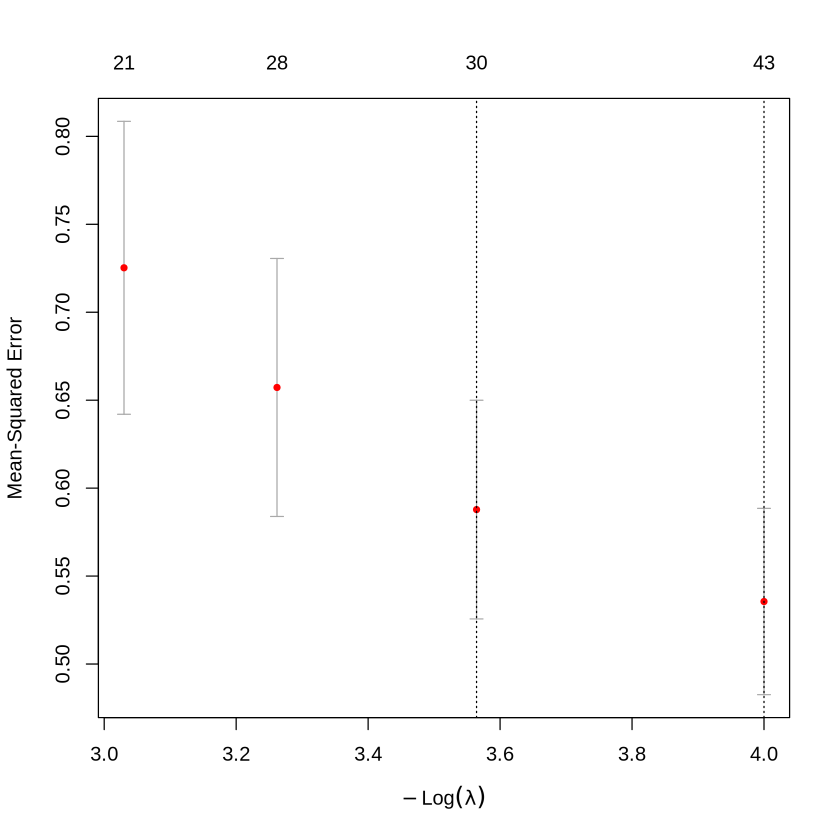

In [4]:
#Podemos ver que si escogemos log(lambda)>-4 no se sube mucho el MSE
#y pasamos de 122 a 46 variables explicativas approx. Ademas hay muchos 
#parametros cerca cero.

sec.lambda<-seq(exp(-4),exp(-3),by=0.01)
lasso.model2 <- cv.glmnet(as.matrix(solTrainXtrans), solTrainY, alpha = 1, standardize = FALSE,lambda=sec.lambda)

plot(lasso.model2)
lasso.model2$lambda.min
coef(lasso.model2)


In [5]:
###############################
#Evaluacion de los dos modelos#
###############################

lasso.pred1 <- predict(lasso.model1, newx = as.matrix(solTestXtrans))
RMSE.lasso1 = RMSE(lasso.pred1, solTestY)
Rsquare.lasso1 = R2(lasso.pred1, solTestY)

lasso.pred2 <- predict(lasso.model2, newx = as.matrix(solTestXtrans))
RMSE.lasso2 = RMSE(lasso.pred2, solTestY)
Rsquare.lasso2 = R2(lasso.pred2, solTestY)

rmse <- cbind("RMSE" = c(RMSE.lasso1, RMSE.lasso2))
rownames(rmse) <- c("Lasso1", "Lasso2")
print(rmse)

rc <- cbind("R-cuadrado" = c(Rsquare.lasso1, Rsquare.lasso2))
rownames(rc) <- c("Lasso1", "Lasso2")
print(rc)

#La diferencia es leve, mejor ir con el segundo modelo que es mas simple



            RMSE
Lasso1 0.7218496
Lasso2 0.7856424
       R-cuadrado
Lasso1  0.8793237
Lasso2  0.8592479
